In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

##実験データ作成

サンプリング周波数40Hzである
使用する信号は周波数2Hzのsin波と3次関数の合成信号  
３次関数の信号をトレンド成分とする

３秒間の信号を処理x軸時間、y軸振幅とする

In [2]:
# 信号の定義
def signal(t, fs, f):
  y = np.sin(2*np.pi*f*t) + (2*t**3+t**2+8*t-3)/20

  return y

# ベースライン補正（多項式）

In [3]:
def base_line(t, sg):
  poly = PolynomialFeatures(degree=3)
  poly.fit(t.reshape(-1,1))
  x_poly_3=poly.transform(t.reshape(-1,1))
  lin_reg_3=LinearRegression().fit(x_poly_3,sg)
  a = lin_reg_3.coef_[3]
  b = lin_reg_3.coef_[2]
  c = lin_reg_3.coef_[1]
  d = lin_reg_3.coef_[0]
  sg1 = a*t**3 + b*t**2 + c*t + d
  origin = sg - sg1

  return origin



# メイン処理：処理前後の比較

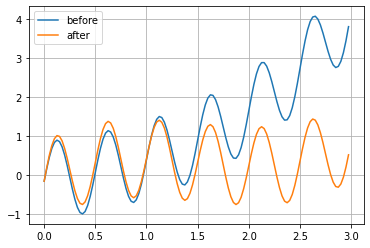

In [4]:
# 変数定義
fs = 40     # サンプリング周波数
f =  2    # 信号の周波数
t = 3      # 時間

# 0 ～t秒までサンプリング周波数の刻みごとのndarrayを作成
t=np.arange(0, t,1/fs)

# 　処理前の信号の作成
before_sg = signal(t ,fs, f)

#　処理後の信号の作成
after_sg = base_line(t,before_sg)

plt.plot(t, before_sg, label="before")
plt.plot(t, after_sg, label="after")
plt.grid()
plt.legend()